# Human Cell Atlas Report

This report downloads data from S3 pertaining to the requested release. This begins by downloading the requisite files.

In [1]:
bucket_id = 'davidcs-hca-release-2ecf2b1e7c8a19db785d'

import boto3
import pandas as pd
s3 = boto3.client('s3')
s3.download_file(Bucket=bucket_id, Filename=bucket_id, Key=bucket_id)
df = pd.read_csv(bucket_id, sep='\t', index_col=0)

The data have been downloaded and are available as a dataframe, `df`. Let's perform a dimensionality reduction and observe the dispersion.

## Principal Components

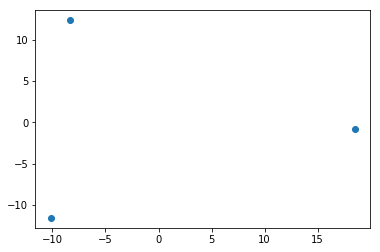

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_values = pca.fit_transform(df)
plt.scatter([x[0] for x in pca_values], [x[1] for x in pca_values])
plt.show()

## t-SNE

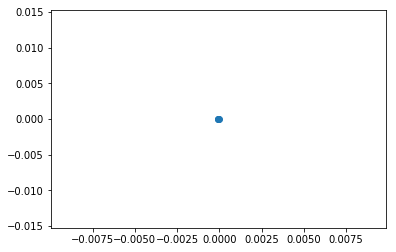

In [3]:
from sklearn.manifold import TSNE
tsne_values = TSNE(n_components=2).fit_transform(df)
plt.scatter([x[0] for x in tsne_values], [x[1] for x in tsne_values])
plt.show()

## k-Means Clustering

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)

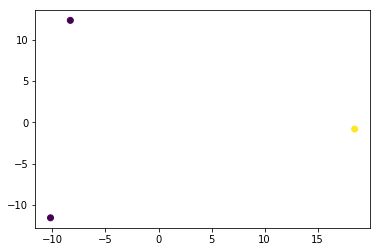

In [5]:
clusters = kmeans.predict(df)
plt.scatter([x[0] for x in pca_values], [x[1] for x in pca_values], c=clusters)
plt.show()

## Load into celldb

Now that these data have been analyzed we can add the results to celldb for further downstream analysis and making available to portals.

In [66]:
from celldb import client
connection = client.connect("localhost")
def upsert_row(row):
    values = row.values
    feature_ids = list(df)
    sample_id = row.name
    client.upsert_sample(
        connection,
        sampleId=sample_id,
        featureIds=feature_ids,
        values=values)

df.apply(upsert_row, axis = 1)

In [76]:
n_samples = len(list(client.list_samples(connection)))
n_features = len(list(client.list_features(connection)))
print("{} samples and {} features loaded into celldb.".format(
    n_samples, n_features))

3 samples and 10 features loaded into celldb.
